In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# SVM Challenges

## Challenge 1: warm-up

Copy here and execute the "Face Recognition" exercise at the end of the "In-Depth: Support Vector Machines" section. Construct the confusion matrix and print the classification report. Answer the two questions:

1. What is the rate at which actual pictures of George W. Bush in the dataset are correctly identified as George W. Bush? 

2. In those cases when the algorithm classified a picture as being that of George W. Bush, how likely was this to be correct?

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


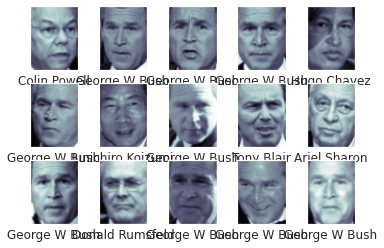

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
#from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 11s, sys: 38.9 s, total: 1min 50s
Wall time: 1min 6s
{'svc__C': 10, 'svc__gamma': 0.001}


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

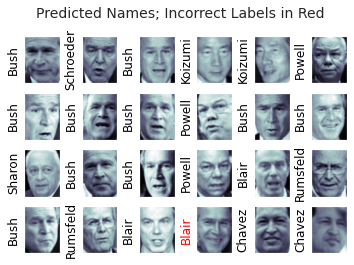

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



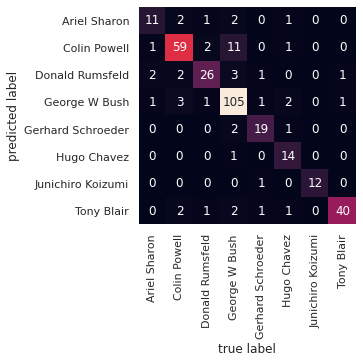

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');



    What is the rate at which actual pictures of George W. Bush in the dataset are correctly identified as George W. Bush?

    From recall section of classification report, recall rate on George W. Bush is .83

    In those cases when the algorithm classified a picture as being that of George W. Bush, how likely was this to be correct?
    From precision section of classification report, .92


## Challenge 2: Classify the moons with Linear SVC and with Polynomial Kernel

### Preliminaries

In class we saw that the linear SVC fails when we have curved boundaries. In this example we will analyze the moons dataset:

In [ ]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

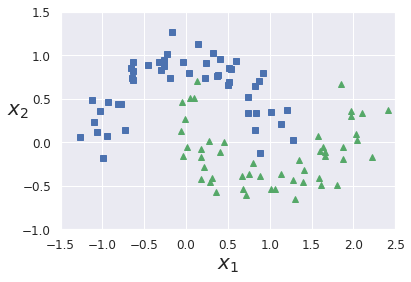

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


One possible approach is to add extra dimensions to our feature space, for example by adding polynomial features by hand, and then still use a linear SVC. The hope is that in the higher dimensional feature space the boundary will be flat and the dataset will be separable. We can combine these steps in a pipeline as we have done before:

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

Support Vector Machine algorithms are not scale invariant, so **it is highly recommended to scale the data**. This is why we also include a *StandardScaler* in the pipeline:

In [ ]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In order to visualize the results, define a function to plot the predictions nicely:

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

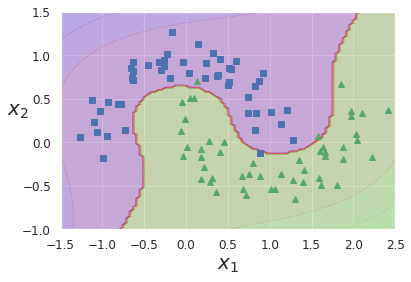

In [ ]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

This trick results in a curved boundary which does a pretty good job of classifying the points.

### Your actual challenge

Your mission is now to accomplish the same task, but without creating polynomial features. Instead, replace the LinearSVC classifier with the more general SVC classifier https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC and use a polynomial kernel of third degree. Once you fit the model, plot the result using the *plot_predictions* function as in the plot above. I have started the solution for you below:

### Solution

In [ ]:
# Once again create a pipeline, only this time omit the polynomialfeatures
poly_kernel_svm_clf = Pipeline([ # No PolynomialFeatures                                
        ("scaler", StandardScaler()), # Still apply the standard scaler
        ("svm_clf", SVC(C = 2, kernel="poly"))    ]) # Replace "???" with the proper arguments for SVC #Poly kernel defaults to cubic
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=2, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

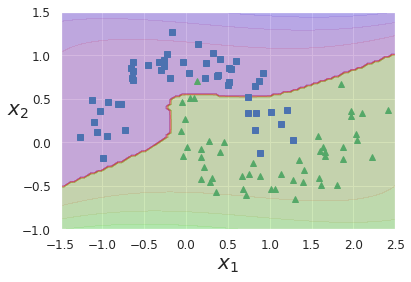

In [ ]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## Challenge 3: Classify the moons with a Radial Basis Function Kernel

Repeat the previous challenge, only this time use a Radial Basis Function kernel. Again, plot the results with the *plot_predictions* function. Consider two values for the regularization parameter C: large ($1000$) and small ($0.001$) and two values for the kernel coefficient $\gamma$: 10 and 0.1 (four cases altogether). Comment on the results.

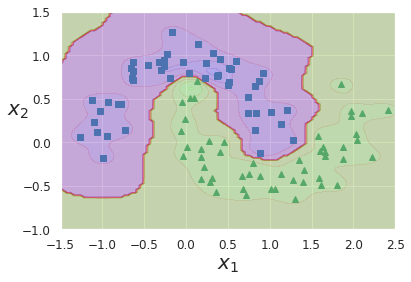

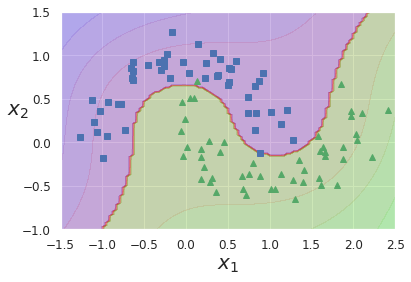

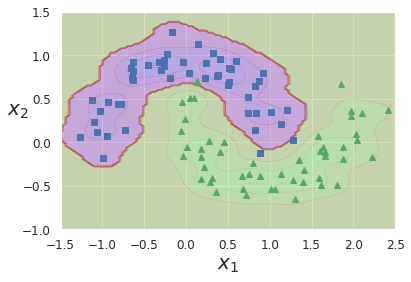

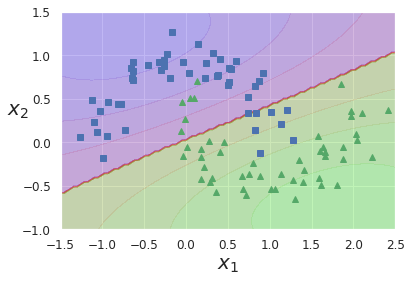

In [ ]:
poly_kernel_svm_clf = Pipeline([ # No PolynomialFeatures                                
        ("scaler", StandardScaler()), # Still apply the standard scaler
        ("svm_clf", SVC(C = 1000, kernel="rbf", gamma=10 ))    ]) 
poly_kernel_svm_clf.fit(X, y)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()
poly_kernel_svm_clf = Pipeline([ # No PolynomialFeatures                                
        ("scaler", StandardScaler()), # Still apply the standard scaler
        ("svm_clf", SVC(C = 1000, kernel="rbf", gamma=.1 ))    ]) 
poly_kernel_svm_clf.fit(X, y)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()
poly_kernel_svm_clf = Pipeline([ # No PolynomialFeatures                                
        ("scaler", StandardScaler()), # Still apply the standard scaler
        ("svm_clf", SVC(C = .001, kernel="rbf", gamma=10 ))    ]) 
poly_kernel_svm_clf.fit(X, y)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()
poly_kernel_svm_clf = Pipeline([ # No PolynomialFeatures                                
        ("scaler", StandardScaler()), # Still apply the standard scaler
        ("svm_clf", SVC(C = .001, kernel="rbf", gamma=.1 ))    ]) 
poly_kernel_svm_clf.fit(X, y)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

The model performs poorly in the final case, that of low C and low Gamma. Most likely the combination led to very little fitting occuring since initial conditions satisifed the low requirements \\
In both of the high gamma cases(C = 1000 and C = .001 with gamma = 10) the model seems overfit to the data, although this is especially true for the high C case \\
Model seems to perform the best with the combination of low C and high gamma 